# Finding Domenant Colours



ValueError: could not broadcast input array from shape (4,) into shape (100,)

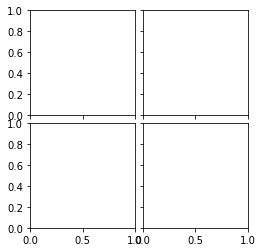

In [15]:
import scipy.cluster
import sklearn.cluster
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

image = PIL.Image.open("test.0000.png")
data_array = np.asarray(image)
shape = data_array.shape
data_array = data_array.reshape(np.product(shape[:2]), shape[2]).astype(float)
kmeans = sklearn.cluster.MiniBatchKMeans(
        n_clusters=10,
        init="k-means++",
        max_iter=20,
        random_state=1000
    ).fit(data_array)
codes = kmeans.cluster_centers_
vecs, _dist = scipy.cluster.vq.vq(data_array, codes)         # assign codes
counts, _bins = np.histogram(vecs, len(codes))    # count occurrences

colours = []
for index in np.argsort(counts)[::-1]:
    colours.append(tuple([int(code) for code in codes[index]]))


fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, colours):
    # Iterating over the grid returns the Axes.
    
plt.show()
    
    
# new_image=IPImage("test.0000.png", width=200, height=200)
# display(new_image)
# for c in colours :
#     square(0,0,40,40,c[0],c[1],c[2],canvas_height=40,canvas_width=40)